## Hierarchical Clustering

### Data 
https://www.kaggle.com/code/vipulgohel/clustering-pca/data<br>

__Data contains:__ <br>

 - Name of the country,
 - Death of children under five years of age per 1000 live births,
 - Exports of goods and services; Exports of goods and services given as %age of the Total GDP;
 - Health_Spending
 - Imports of goods and services, Given as %age of the Total GDP;
 - Net income per person;
 - The measurement of the annual growth rate of the Total GDP;
 - The average number of years a newborn child would live if the current mortality patterns are to remain the same;
 - The number of children born to each woman if the current age-fertility rates remain the same.
 - GDP

In [1]:
# # Suppressing Warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
# Importing the dataset
df = pd.read_csv('Country-data.csv')
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Check the number of columns and rows
Number_of_rows = df.shape[0]    # 0 indexing rows
Number_of_columns = df.shape[1]  # 1 indexing columns
print("Number_of_rows (countries) = ", Number_of_rows)
print("Number_of_columns = ", Number_of_columns)

Number_of_rows (countries) =  167
Number_of_columns =  10


In [6]:
# Change Colum Title
df.columns=["Country", "Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
df.head(2)

,Country,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [7]:
# check number of catogrical features
categorical_features = df.select_dtypes(include = ["object"]).columns
print("Categorical features = ",categorical_features)

Categorical features =  Index(['Country'], dtype='object')


In [8]:
# check number of catogrical and numerical features
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print("Numerical features = ",numerical_features)

Numerical features =  Index(['Child_Mortality', 'Exports', 'Health_Spending', 'Imports', 'Income',
       'Inflation', 'Life_Expectancy', 'Total_Fertility', 'GDP_per_capita'],
      dtype='object')


In [9]:
# check the catogrical data - spelling country names
print('\033[1m' + "Country column description" + '\033[0m') # '\033[1m' + "print bold" + '\033[0m'
print('----------------------------------')
print("Total Countries :", len(df.Country.unique()),"\n", df.Country.unique())


Country column description
----------------------------------
Total Countries : 167 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 

In [10]:
# identify missing value
print("Percentage of Missing Data: ", round(100*(df.isnull()).sum()/len(df), 2))

Percentage of Missing Data:  Country            0.0
Child_Mortality    0.0
Exports            0.0
Health_Spending    0.0
Imports            0.0
Income             0.0
Inflation          0.0
Life_Expectancy    0.0
Total_Fertility    0.0
GDP_per_capita     0.0
dtype: float64


In [11]:
# identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          167 non-null    object 
 1   Child_Mortality  167 non-null    float64
 2   Exports          167 non-null    float64
 3   Health_Spending  167 non-null    float64
 4   Imports          167 non-null    float64
 5   Income           167 non-null    int64  
 6   Inflation        167 non-null    float64
 7   Life_Expectancy  167 non-null    float64
 8   Total_Fertility  167 non-null    float64
 9   GDP_per_capita   167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
X = df.loc[:,["Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]].values
y = df.loc[:,['Country']] # We DO NOT need these for CLUSTERING (but will come handy later on)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Sc = sc.fit_transform(X)

### Using the dendrogram to find the optimal number of clusters

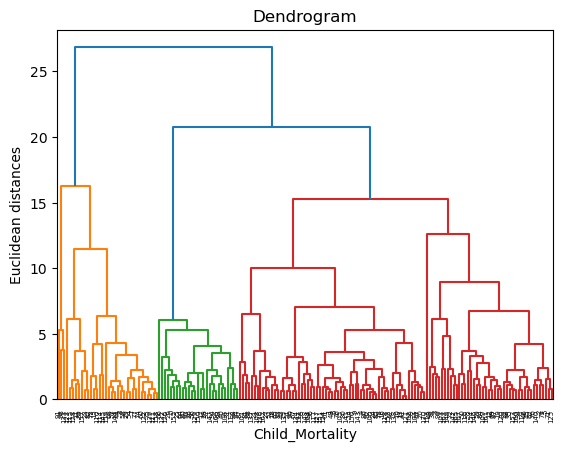

In [14]:
# Takes a while to compute
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_Sc, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Child_Mortality')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

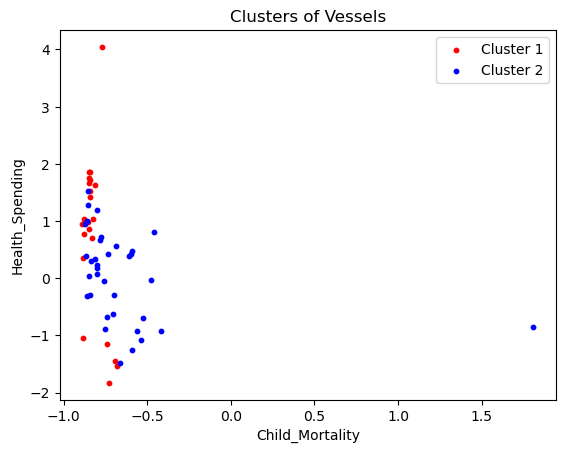

In [16]:
# Visualising the clusters 
# ["Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
plt.scatter(X_Sc[y_hc == 0, 0], X_Sc[y_hc == 0, 2], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_Sc[y_hc == 1, 0], X_Sc[y_hc == 1, 2], s = 10, c = 'blue', label = 'Cluster 2')

plt.title('Clusters of Vessels')
plt.xlabel('Child_Mortality')
plt.ylabel('Health_Spending')
plt.legend()
plt.show()

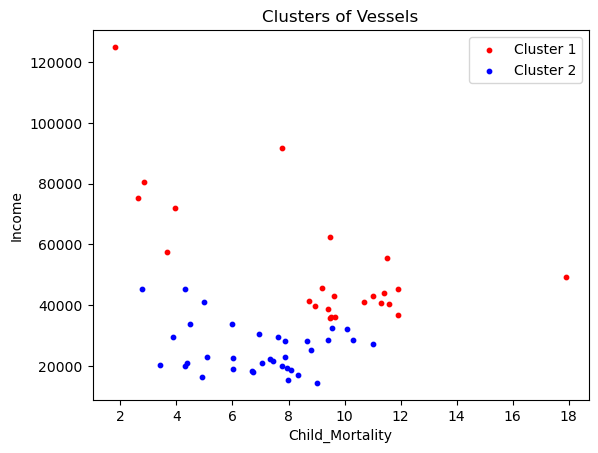

In [17]:
# Visualising the clusters 
# ["Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
plt.scatter(X[y_hc == 0, 2], X[y_hc == 0, 4], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 2], X[y_hc == 1, 4], s = 10, c = 'blue', label = 'Cluster 2')

plt.title('Clusters of Vessels')
plt.xlabel('Child_Mortality')
plt.ylabel('Income')
plt.legend()
plt.show()